<a href="https://colab.research.google.com/github/M-S-Abhiram-Verma/Spam-Message-Detection-using-ML/blob/main/end_to_end_ml_6_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 63.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

In [ ]:
df = df.iloc[:,0:2]

In [ ]:
df.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


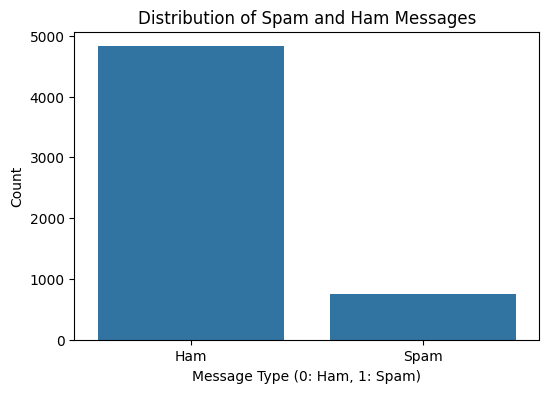

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='spam', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Message Type (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [ ]:
X = df.iloc[:,-1]

In [ ]:
X.head()

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
y = df.iloc[:,0:1]

In [ ]:
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [ ]:
display(X.shape)

(5572,)

In [ ]:
display(y.shape)

(5572, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,message
1549,Dude sux for snake. He got old and raiden got ...
2272,"Haha awesome, I've been to 4u a couple times. ..."
1942,K...k:)why cant you come here and search job:)
3314,FREE MESSAGE Activate your 500 FREE Text Messa...
4765,Whens your radio show?
...,...
184,Going on nothing great.bye
4022,Well. Balls. Time to make calls
578,"our mobile number has won å£5000, to claim cal..."
3788,Are you sure you don't mean \get here


In [ ]:
y_train

,spam
1549,0
2272,0
1942,0
3314,1
4765,0
...,...
184,0
4022,0
578,1
3788,0


In [ ]:
X_test

,message
1797,Can i get your opinion on something first?
3855,I'm ok. Will do my part tomorrow
1066,Once free call me sir. I am waiting for you.
2037,Oh sorry please its over
800,Last Chance! Claim ur å£150 worth of discount ...
...,...
1838,Hack Chat. Get backdoor entry into 121 chat ro...
3316,"No worries, hope photo shoot went well. have a..."
2238,Think you sent the text to the home phone. Tha...
1110,Ok ill tell the company


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (5014, 5000)
Shape of X_test_tfidf: (558, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9659
Precision: 1.0000
Recall: 0.7654
F1-score: 0.8671


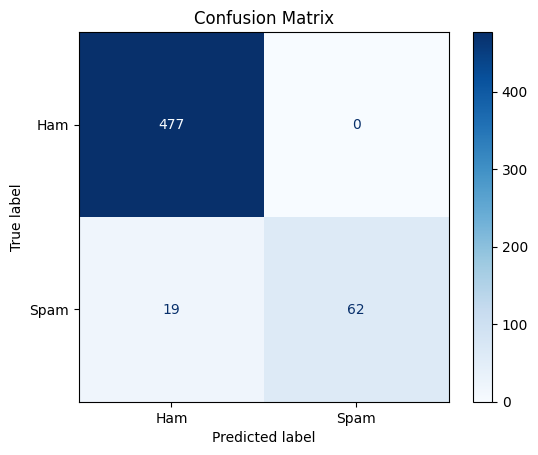

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

In [ ]:
import pickle

# Save the trained model
pickle.dump(model, open('model_spam_dataset.pkl', 'wb'))

print("Model saved successfully as model.pkl")

Model saved successfully as model.pkl


In [ ]:
import pickle

# Save the fitted TF-IDF vectorizer
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

print("TF-IDF vectorizer saved successfully as tfidf_vectorizer.pkl")

TF-IDF vectorizer saved successfully as tfidf_vectorizer.pkl
